## The following code creates the `chowkidar_proportions` csv.

In [2]:
import csv
import re
import sqlite3
import numpy as np
import pandas as pd

#matplotlin
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

`chowkidar_proportions` is calculated by dividing the number of an MP's followers who changed their name to Chowkidar in 2019 by their total number of followers. In my project, I use it as a proxy for ideology: having more followers who changed their name to Chowkidar indicates a following that has a stronger allegiance to Modi and the BJP, therefore indicating that the MP is most likely closer to Modi/BJP in terms of ideology.

To create the measure of `chowkidar_proportions`, I use two csv files: `following_2018` contains all the people followed by MPs in 2018, before the Chowkidar campaign, while `following_2019` has all the followers in 2019 after the Chowkidar campaign.

In [3]:
following_2018 = pd.read_csv('../Data/mp_following_data.csv')
following_2019 = pd.read_csv('../Data/mp_following_data_2019.csv', encoding='ISO-8859-1')

In [3]:
following_2018.head(1)

,source,target,name,location,description,created_time,created_date,followers,following,tweets
0,andamanmp,rashtrapatibhvn,President of India,"New Delhi, India",This is the official Twitter account of Rashtr...,13:12:17,07/13/17,3907846,1,2048


In [4]:
following_2019.head(1)

,Unnamed: 0,mp_handle,id,description,verified,followers_count,statuses_count,friends_count,following,screen_name,favourites_count,name,created_at
0,0,abhishekaitc,420376232.0,"Actor by passion,profile managed by me",TRUE,689905,7521,278.0,FALSE,mimichakraborty,2179.0,Mimssi,Thu Nov 24 15:01:57 +0000 2011


In [5]:
following_2018.loc[following_2018['source'] == 'abhishekaitc'].head(1)

,source,target,name,location,description,created_time,created_date,followers,following,tweets
93721,abhishekaitc,thewire_in,The Wire,NaN,An independent publication carrying authoritat...,07:32:06,04/12/15,258695,49,44115


In [16]:
type(following_2018.loc[following_2018['source'] == 'andamanmp']['target'])

pandas.core.series.Series

To see which of the 2018 followers changed their name to Chowkidar, I first need to filter down the tables to look at only people who were following these MPs both in 2018 and 2019.

In [18]:
def same_followers(handle):
    """Go through the followers in 2019, and see if they were also following in 2018. Keep only the ones who were,
    and store them in followers_in_common."""
    
    # Assigning variables to the columns containing the lists of followers.
    followers_2018 = list(following_2018.loc[following_2018['source'] == handle]['target'])
    followers_2019 = list(following_2019.loc[following_2019['mp_handle'] == handle]['screen_name'])
    followers_in_common = []
    # Narrowing down to only followers in 2019 and 2018:
    for follower in followers_2019:
        if follower in followers_2018:
            followers_in_common.append(follower)
    mp_df = following_2019.loc[following_2019['mp_handle'] == handle]
    # Narrowing down the datraframe to just these followers
    same_followers_df = mp_df.loc[mp_df['screen_name'].isin(followers_in_common)]
    return same_followers_df

In [19]:
same_followers('narendramodi')

,Unnamed: 0,mp_handle,id,description,verified,followers_count,statuses_count,friends_count,following,screen_name,favourites_count,name,created_at
79276,79268,narendramodi,2.091914e+08,Unabashedly Nationalist & a very PROUD Hindu. ...,FALSE,4346,25554,409.0,FALSE,basant_nayar,11033.0,Chowkidar Basant Nayar,Thu Oct 28 17:58:28 +0000 2010
79277,79269,narendramodi,2.519691e+09,Passionate Indian who believes that Each One o...,FALSE,9139,157559,2851.0,FALSE,savitha_rao,181250.0,#IndiaFirst Chowkidar ð®ð³,Sat May 24 06:39:45 +0000 2014
79278,79270,narendramodi,2.846018e+09,I am still studying N love my nation #INDIA fo...,FALSE,6729,19556,5093.0,FALSE,sauravsaha41,102257.0,Chowkidar Saurav Saha,Wed Oct 08 03:52:36 +0000 2014
79279,79271,narendramodi,1.917133e+08,Snowboarder | 2x Olympic Medalist | 15x X Game...,TRUE,197006,2770,326.0,FALSE,markmcmorris,2970.0,Mark McMorris,Fri Sep 17 04:13:43 +0000 2010
79280,79272,narendramodi,1.404591e+09,President of the Islamic Republic of Iran ð®...,TRUE,808549,3553,9.0,FALSE,HassanRouhani,218.0,Hassan Rouhani,Sun May 05 09:26:33 +0000 2013
79281,79273,narendramodi,8.817315e+08,Shaping Future Governments / Ø§Ø³ØªØ´Ø±Ø§Ù Ø­...,TRUE,187385,9531,147.0,FALSE,WorldGovSummit,1458.0,World Gov Summit,Mon Oct 15 06:52:09 +0000 2012
79282,79274,narendramodi,2.857681e+09,"MBBS student |Proud,honoured & blessed to be f...",FALSE,8387,96709,2652.0,FALSE,saagar_anand,70000.0,Chowkidar Saagar Anand,Thu Oct 16 07:12:20 +0000 2014
79283,79275,narendramodi,1.119429e+08,A Punjabi who says a lot of 'aiyyo'. Self-obse...,FALSE,11584,29163,1939.0,FALSE,followaanchal,42626.0,Aanchal ð®ð³,Sat Feb 06 17:51:46 +0000 2010
79284,79276,narendramodi,7.201066e+07,NaN,FALSE,1617,1519,247.0,FALSE,jdt4uonly,790.0,Nation first,Sun Sep 06 10:29:14 +0000 2009
79285,79277,narendramodi,1.326152e+08,"Proud Indian,Structural Engineer-MIEAust,Fan o...",FALSE,2239,1780,193.0,FALSE,arvindpalla,1567.0,Arvind Pallað®ð³,Tue Apr 13 18:32:23 +0000 2010


I also need to narrow down to the MPs that appear in both tables:

In [20]:
same_mps = []
for mp in following_2019['mp_handle'].unique():
    if mp in following_2018['source'].unique():
        same_mps.append(mp)

In [21]:
list(same_followers('narendramodi').columns)

['Unnamed: 0',
 'mp_handle',
 'id',
 'description',
 'verified',
 'followers_count',
 'statuses_count',
 'friends_count',
 'following',
 'screen_name',
 'favourites_count',
 'name',
 'created_at']

In [22]:
# First I create an empty dataframe with the same columns as the filtered down dataframe.
filtered_down_followers = pd.DataFrame(columns=list(same_followers('narendramodi').columns))
# Then, I fill it with only the MPs in same_mps and only the followers in same_followers.
for mp in same_mps:
    filtered_down_followers = filtered_down_followers.append(same_followers(mp))

KeyboardInterrupt: 

In [ ]:
# filtered_down_followers = filtered_down_followers.drop(['ratio'], axis=1)
filtered_down_followers

In [1]:
# Saving it to a csv so that I can just load the csv instead of running all the above code every time.
filtered_down_followers.to_csv('../Results/filtered_down_followers.csv')

NameError: name 'filtered_down_followers' is not defined

In [44]:
filtered_down_followers = pd.read_csv('../Results/filtered_down_followers.csv')
filtered_down_followers = filtered_down_followers.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
filtered_down_followers.head(1)

,mp_handle,id,description,verified,followers_count,statuses_count,friends_count,following,screen_name,favourites_count,name,created_at
0,abhishekaitc,320040089.0,Tollywood Actress !! Always try to think posit...,True,1293035,5132,159.0,False,srabantismile,1580.0,Srabanti,Sun Jun 19 05:50:52 +0000 2011


In [21]:
following_2018.head(1)

,source,target,name,location,description,created_time,created_date,followers,following,tweets
0,andamanmp,rashtrapatibhvn,President of India,"New Delhi, India",This is the official Twitter account of Rashtr...,13:12:17,07/13/17,3907846,1,2048
1,andamanmp,yogrishiramdev,Swami Ramdev,Haridwar,This is an official Account of Baba Ramdev. Ma...,08:55:03,04/21/12,1610503,432,9652
2,andamanmp,v_shrivsatish,V Satish,India,NATIONAL JOINT GENERAL SECRETARY (ORGANISATION...,03:57:14,10/24/12,95308,41,5310
3,andamanmp,FinMinIndia,Ministry of Finance,New Delhi,"Official Account of the Ministry of Finance, G...",17:30:14,07/09/14,984833,181,12857
4,andamanmp,PIB_India,PIB India,New Delhi,Press Information Bureau. Nodal agency for com...,11:55:36,12/27/10,1344708,365,184812
5,andamanmp,timesofindia,Times of India,New Delhi,News. Views. Analyses. Conversations. India’s ...,10:50:15,04/19/10,11129919,504,368777
6,andamanmp,GoI_MeitY,Ministry of E & IT,New Delhi,भारत सरकार की इलेक्‍ट्रॉनिकी और सूचना प्रौद्यो...,09:57:49,06/16/14,161392,356,11619
7,andamanmp,_DigitalIndia,Digital India,"New Delhi, Delhi",This is the official Twitter account of Digita...,06:24:21,07/28/14,938469,476,10035
8,andamanmp,mygovindia,MyGovIndia,New Delhi,"Citizen engagement platform of GoI, giving peo...",06:57:18,07/28/14,1367345,174,9984
9,andamanmp,shaktisinha,shakti sinha,NaN,RT # endorsement,10:01:57,07/07/09,2719,394,4043


In [26]:
following_2019.head(1)

,Unnamed: 0,mp_handle,id,description,verified,followers_count,statuses_count,friends_count,following,screen_name,favourites_count,name,created_at
0,0,abhishekaitc,420376232.0,"Actor by passion,profile managed by me",TRUE,689905,7521,278.0,FALSE,mimichakraborty,2179.0,Mimssi,Thu Nov 24 15:01:57 +0000 2011


In [42]:
list(following_2019.loc[following_2019['screen_name'] == 'srabantismile']['name'])[0]

'Srabanti'

Here I create a list `chowkidar_column` that contains a 1 if the follower changed their name to Chowkidar and 0 if they didn't.

In [45]:
chowkidar_column = []
for target in following_2018['target']:
    # I use try/except because some of the formatting is off, so I use this to not throw an error.
    try:
        name_2019 = list(following_2019.loc[following_2019['screen_name'] == target]['name'])[0]
    except:
        name_2019 = ''
    
    try:
        if 'Chowkidar'in name_2019:
            chowkidar_column.append(1)
        else:
            chowkidar_column.append(0)
    except:
        chowkidar_column.append(0)

In [47]:
sum(chowkidar_column), len(chowkidar_column), len(following_2018.index)

(20600, 94182, 94182)

Then, I append it to the `following_2018` table.

In [49]:
chowkidar_count_2018 = following_2018.copy()
chowkidar_count_2018['chowkidar yes/no'] = chowkidar_column
chowkidar_count_2018

,source,target,name,location,description,created_time,created_date,followers,following,tweets,chowkidar yes/no
0,andamanmp,rashtrapatibhvn,President of India,"New Delhi, India",This is the official Twitter account of Rashtr...,13:12:17,07/13/17,3907846,1,2048,0
1,andamanmp,yogrishiramdev,Swami Ramdev,Haridwar,This is an official Account of Baba Ramdev. Ma...,08:55:03,04/21/12,1610503,432,9652,0
2,andamanmp,v_shrivsatish,V Satish,India,NATIONAL JOINT GENERAL SECRETARY (ORGANISATION...,03:57:14,10/24/12,95308,41,5310,1
3,andamanmp,FinMinIndia,Ministry of Finance,New Delhi,"Official Account of the Ministry of Finance, G...",17:30:14,07/09/14,984833,181,12857,0
4,andamanmp,PIB_India,PIB India,New Delhi,Press Information Bureau. Nodal agency for com...,11:55:36,12/27/10,1344708,365,184812,0
5,andamanmp,timesofindia,Times of India,New Delhi,News. Views. Analyses. Conversations. India’s ...,10:50:15,04/19/10,11129919,504,368777,0
6,andamanmp,GoI_MeitY,Ministry of E & IT,New Delhi,भारत सरकार की इलेक्‍ट्रॉनिकी और सूचना प्रौद्यो...,09:57:49,06/16/14,161392,356,11619,0
7,andamanmp,_DigitalIndia,Digital India,"New Delhi, Delhi",This is the official Twitter account of Digita...,06:24:21,07/28/14,938469,476,10035,0
8,andamanmp,mygovindia,MyGovIndia,New Delhi,"Citizen engagement platform of GoI, giving peo...",06:57:18,07/28/14,1367345,174,9984,0
9,andamanmp,shaktisinha,shakti sinha,NaN,RT # endorsement,10:01:57,07/07/09,2719,394,4043,0


In [50]:
chowkidar_count_2018.to_csv('../Results/chowkidar_count_2018.csv')

In [3]:
chowkidar_count_2018 = pd.read_csv('../Results/chowkidar_count_2018.csv')
chowkidar_count_2018 = chowkidar_count_2018.drop(['Unnamed: 0'], axis=1)
chowkidar_count_2018.head(1)

,source,target,name,location,description,created_time,created_date,followers,following,tweets,chowkidar yes/no
0,andamanmp,rashtrapatibhvn,President of India,"New Delhi, India",This is the official Twitter account of Rashtr...,13:12:17,07/13/17,3907846,1,2048,0


`chowkidar_count` has one row for every single follower of an MP in our data, coded according to whether or not they changed their name to Chowkidar. All that's left is to calculate for each MP, how many of their followers changed their name over how many they have total.

An easy way to do this is to group by MP (in the `source` column) and aggregate using the mean, which will in effect sum all the 1s (telling us how many changed their handle to Chowkidar) and divide by the total number of followers for each MP.

In [25]:
# Grouped by MP
chowkidar_proportions = chowkidar_count_2018.groupby(['source']).agg(['mean']).reset_index()
chowkidar_proportions.columns = ['source', 'followers mean', 'following mean', 'tweets mean', 'chowkidar yes/no mean']
chowkidar_proportions = chowkidar_proportions.drop(['followers mean', 'following mean', 'tweets mean'], axis=1)
chowkidar_proportions = chowkidar_proportions.sort_values(by='chowkidar yes/no mean')
chowkidar_proportions.head(5)

,source,chowkidar yes/no mean
254,mphemantgodse,0.0
299,salimdotcomrade,0.0
52,ET_MohdBasheer,0.0
134,RavneetBittu,0.0
102,MausamNoor,0.0


In [61]:
len(chowkidar_proportions.index)

327

In [60]:
chowkidar_proportions.to_csv('../Results/chowkidar_proportions.csv')

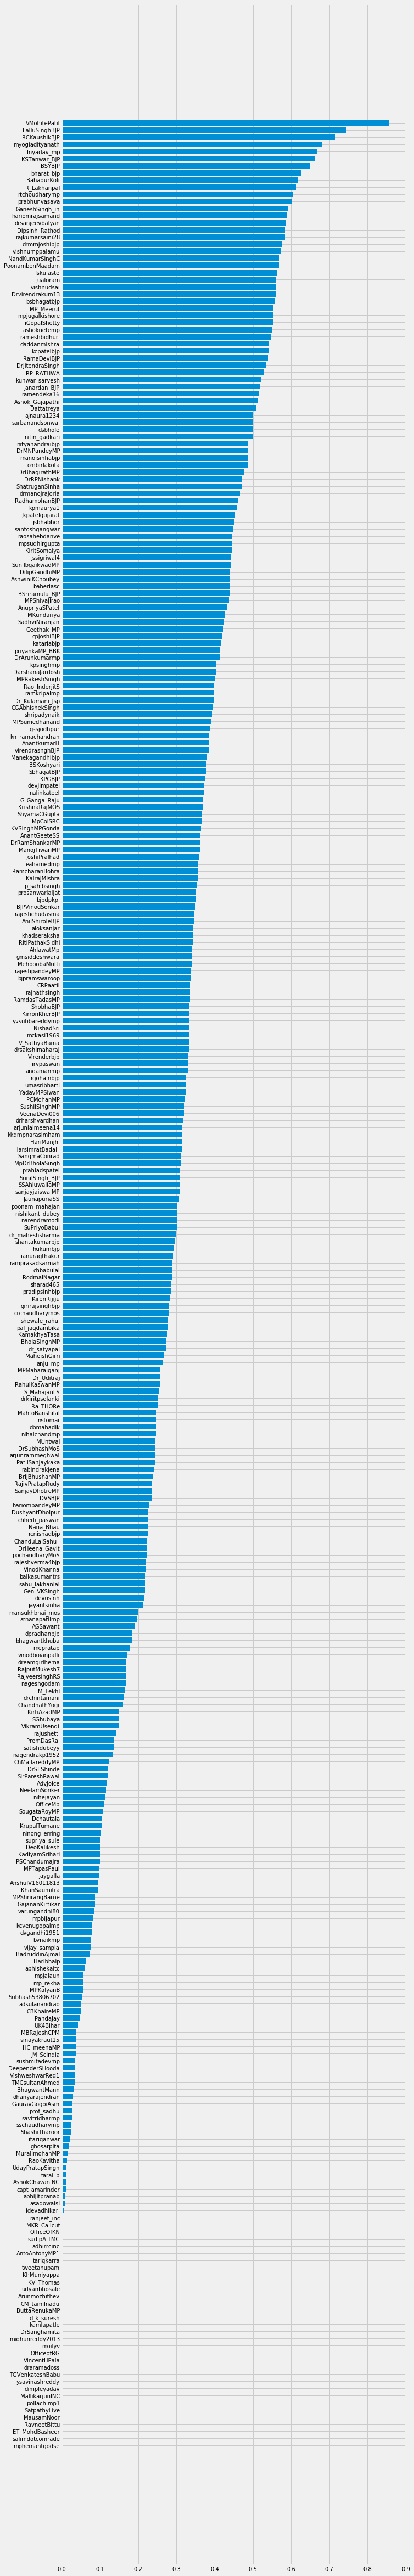

In [59]:
# Plot, just for fun.
mps = chowkidar_proportions['source']
array = np.arange(len(mps))
proportion = chowkidar_proportions['chowkidar yes/no mean']

matplotlib.rcParams['figure.figsize'] = (10, 80)
plt.rcParams.update({'font.size': 10})
plt.barh(array, proportion)
plt.yticks(array, mps)
plt.show()